# Unraveling Heavy Traffic Indicators – Exploring I-94 Westbound Traffic

## 1. The I-94 Traffic Dataset

In this project, we're going to analyze a dataset concerning westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). Thanks to John Hogue, we can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

Our analysis aims to identify several indicators of heavy traffic on `I-94`. These indicators may include weather conditions, time of the day, day of the week, and more. For instance, we may find out that traffic is typically heavier in the summer or during snowy conditions.

Now, let's explore our dataset and extract some summary information.

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd

# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

# Read the CSV file 'metro_interstate_traffic.csv' into a pandas DataFrame
i_94 = pd.read_csv('Datasets/metro_interstate_traffic.csv')

# Display the first 3 rows
i_94.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.00,0.00,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.00,0.00,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.00,0.00,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [2]:
# Display the last 3 rows
i_94.tail(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48201,NaN,282.73,0.00,0.00,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.00,0.00,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.00,0.00,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
# Display concise summary information
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset consists of `48,204` rows and `9` columns, with no null values except for the `holiday` column. Each row represents traffic and weather data for a specific hour, spanning from `2012-10-02 09:00:00` to `2018-09-30 23:00:00`.

## 2. Analyzing Traffic Volume

According to the [dataset's documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), a station situated approximately midway between `Minneapolis` and `Saint Paul` records traffic data. This station monitors westbound traffic, indicating cars moving from east to west. Consequently, the results of our analysis will pertain specifically to westbound traffic near the station. Therefore, our findings should not be generalized to the entire `I-94` highway.

<div style="margin-top: 15px; margin-bottom: 10px;">
    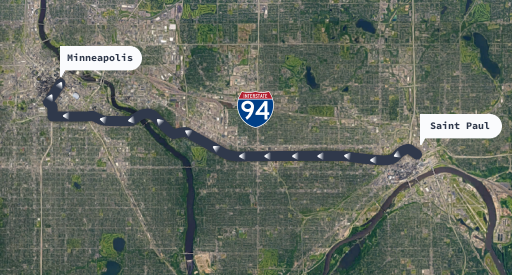
</div>

Next, let's plot a histogram to visualize the distribution of traffic volume in the dataset, and gather some statistics about it.

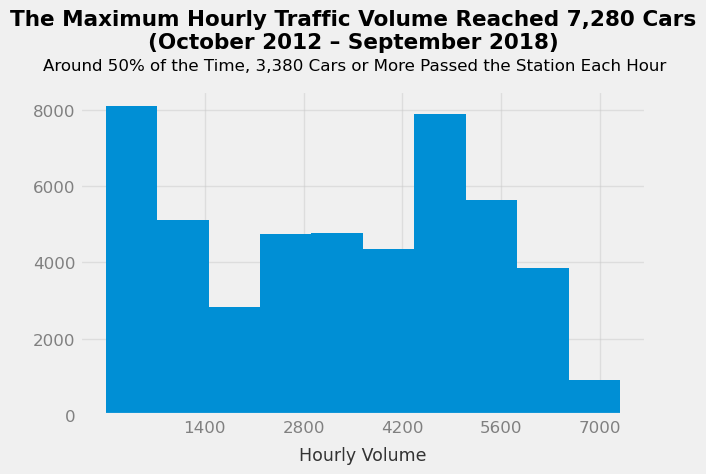

In [4]:
# Set the plot style to 'fivethirtyeight', and specify the size of the figure
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6.5, 4))

# Plot a histogram for the 'traffic_volume' column
plt.hist(i_94['traffic_volume'])

# Add a main title and a subtitle
plt.suptitle('The Maximum Hourly Traffic Volume Reached 7,280 Cars\n(October 2012 – September 2018)',
             x=0.5, y=1.085, size=15.5, ha='center', weight='bold')
plt.title('Around 50% of the Time, 3,380 Cars or More Passed the Station Each Hour',
          x=0.485, y=1.04, size=12, ha='center')

# Customize ticks and gridlines for both axes, and add x-axis label
plt.xticks(range(1400, 8400, 1400), size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('Hourly Volume', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

In [5]:
# Generate descriptive statistics for the 'traffic_volume' column
i_94['traffic_volume'].describe()

count   48204.00
mean     3259.82
std      1986.86
min         0.00
25%      1193.00
50%      3380.00
75%      4933.00
max      7280.00
Name: traffic_volume, dtype: float64

Between `2012-10-02 09:00:00` and `2018-09-30 23:00:00`, the hourly traffic volume ranged from `0` to `7,280` cars, with a mean average of `3,260` cars.

About `25%` of the time, there were fewer than `1,193` cars passing the station each hour, which likely occurs during the night or when a road is under construction. However, approximately `25%` of the time, the traffic volume was at least four times as much, with `4,933` cars or more.

This observation provides an interesting direction for our analysis – comparing `daytime` with `nighttime` data.

## 3. Traffic Volume: Day vs. Night (I)

We'll begin by splitting the dataset into two parts, each covering a `12-hour` period:

* `Daytime data` – hours from `7 AM` to `7 PM`.
* `Nighttime data` – hours from `7 PM` to `7 AM`.

Although this criterion may not perfectly distinguish between `daytime` and `nighttime`, it serves as a good starting point.

In [6]:
# Convert the 'date_time' column to datetime format
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

# Select both daytime and nighttime data
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

# Print the shape of the selected datasets
print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


We can attribute the significant difference in row numbers between the `day` and `night` datasets to hours of missing data. For instance, if we examine rows `176` and `177`, we'll notice there's no data for `4 AM` and `5 AM`:

In [7]:
# Select rows 176 and 177 from the DataFrame 'i_94'
i_94.loc[176:177]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,NaN,281.17,0.00,0.00,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,NaN,281.25,0.00,0.00,92,Clear,sky is clear,2012-10-10 06:00:00,5875


## 4. Traffic Volume: Day vs. Night (II)

After dividing the main dataset into two parts, we'll compare the traffic volume for both `daytime` and `nighttime`.

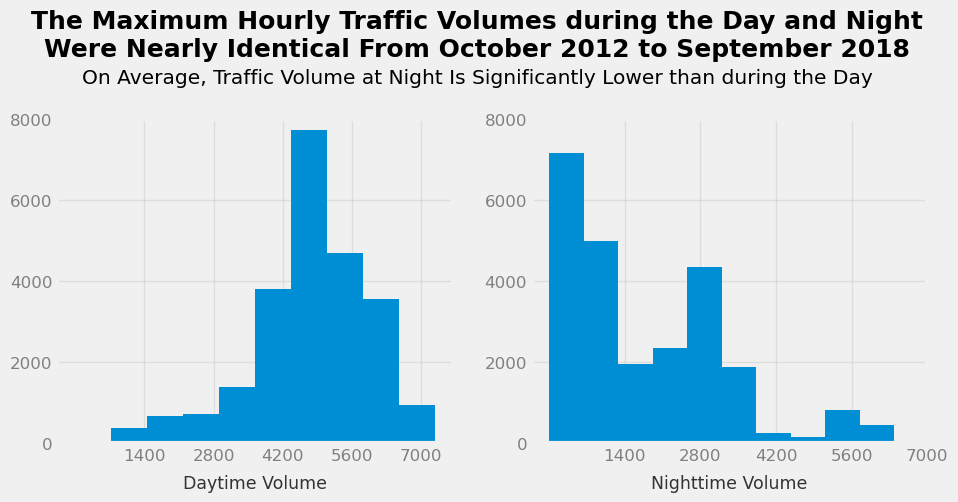

In [8]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Add a main title and a subtitle
plt.suptitle('The Maximum Hourly Traffic Volumes during the Day and Night\n\
Were Nearly Identical From October 2012 to September 2018',
             ha="center", weight='bold', size=18, x=0.5, y=1.155)
plt.figtext(s="On Average, Traffic Volume at Night Is Significantly Lower than during the Day",
            ha="center", x=0.5, y=0.97, size=14.5)

# Plot the histogram for daytime traffic volume
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlabel('Daytime Volume', c='#333333', labelpad=8, size=12.5)
plt.xticks(range(1400, 8400, 1400), size=12, c='grey')
plt.yticks(range(0, 9000, 2000), size=12, c='grey')
plt.ylim(0, 8000)
plt.grid(alpha=0.5)

# Plot the histogram for nighttime traffic volume
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlabel('Nighttime Volume', c='#333333', labelpad=8, size=12.5)
plt.xticks(range(1400, 8400, 1400), size=12, c='grey')
plt.yticks(range(0, 9000, 2000), size=12, c='grey')
plt.grid(alpha=0.5)

# Display the plot
plt.show()

In [9]:
# Print descriptive statistics for daytime and nighttime traffic volume
print(day['traffic_volume'].describe(), end='\n\n')
print(night['traffic_volume'].describe())

count   23877.00
mean     4762.05
std      1174.55
min         0.00
25%      4252.00
50%      4820.00
75%      5559.00
max      7280.00
Name: traffic_volume, dtype: float64

count   24327.00
mean     1785.38
std      1441.95
min         0.00
25%       530.00
50%      1287.00
75%      2819.00
max      6386.00
Name: traffic_volume, dtype: float64


The histogram displaying the distribution of `daytime` traffic volume is left skewed, indicating that most of the traffic volume values are high. With `25%` of values below `4,252`, there are `4,252` or more cars passing the station each hour `75%` of the time.

Conversely, the histogram displaying the distribution of `nighttime` traffic volume is right skewed, indicating that most of the traffic volume values are low. With `25%` of values at or above `2,819`, there are fewer than `2,819` cars passing the station each hour `75%` of the time.

While there are still measurements of over `5,000` cars per hour, night traffic is significantly lighter compared to the day. It's worth noting that our focus is on finding indicators of heavy traffic, so we'll solely analyze `daytime` data moving forward.

## 5. Time Indicators (I)

One possible indicator of heavy traffic is time. There may be more people on the road in certain months, on certain days of the week, or at certain times of the day.

Therefore, we'll create some line plots to see how traffic volume changes with respect to the `month`, `day of the week`, `time of the day`. Let's start with generating the plot for the first time unit – `month`.

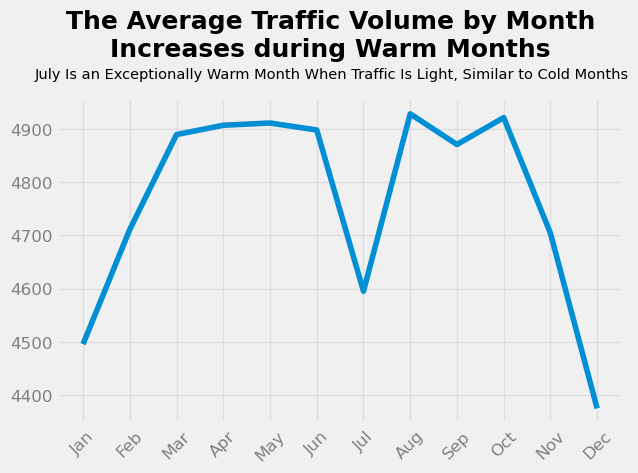

In [10]:
# Select numerical columns from the daytime dataset, and extract the month from the 'date_time' column
day_numeric = day.select_dtypes(include=['number'])
day_numeric['month'] = day['date_time'].dt.month

# Group the data and calculate the average traffic volume by month
by_month = day_numeric.groupby('month')['traffic_volume'].mean()

# Define abbreviated month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Create a figure with the specified size, and plot the average traffic volume by month
plt.figure(figsize=(6.5, 4))
plt.plot(by_month)

# Add a main title and a subtitle
plt.suptitle('The Average Traffic Volume by Month\nIncreases during Warm Months',
             x=0.5, y=1.105, size=18, ha='center', weight='bold')
plt.title('July Is an Exceptionally Warm Month When Traffic Is Light, Similar to Cold Months',
          x=0.485, y=1.04, size=10.5, ha='center')

# Customize ticks and gridlines for both axes
plt.xticks(ticks=range(1,13), labels=months, rotation=45, size=12, c='grey')
plt.yticks(range(4400, 5000, 100), size=12, c='grey')
plt.grid(alpha=0.5)

# Display the plot
plt.show()

The mean traffic volume by month appears lighter during cold months (`November`–`February`) and more intense during warm months (`March`–`October`), with the exception of `July`. This information raises few questions:
* Is there anything special about `July`?
* Is traffic significantly lighter in `July` every year?

To address our questions, let's examine how the traffic volume changed every year in `July`.

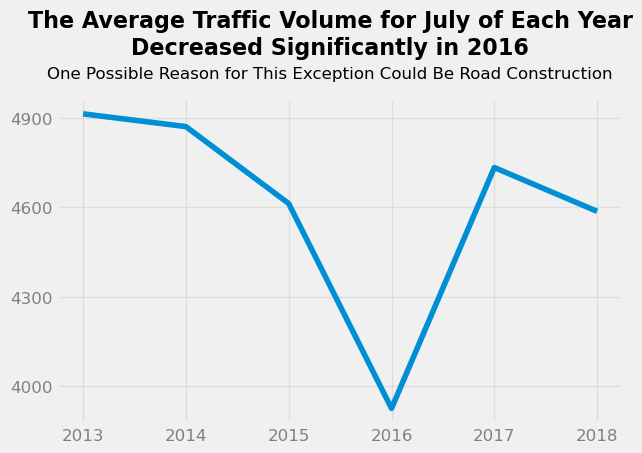

In [11]:
# Extract the year from the 'date_time' column
day_numeric['year'] = day['date_time'].dt.year

# Filter the data to include only July
only_july = day_numeric[day_numeric['month'] == 7]

# Group the data and calculate the average traffic volume by year for each July
by_year = only_july.groupby('year')['traffic_volume'].mean()


# Specify the figure size, and plot the average traffic volume by year for each July
plt.figure(figsize=(6.5, 4))
plt.plot(by_year)

# Add a main title and a subtitle
plt.suptitle('The Average Traffic Volume for July of Each Year\nDecreased Significantly in 2016',
             x=0.5, y=1.105, size=16, ha='center', weight='bold')
plt.title('One Possible Reason for This Exception Could Be Road Construction',
          x=0.482, y=1.04, size=12, ha='center')

# Customize ticks and gridlines for both axes
plt.xticks(range(2013, 2019), size=12, c='grey')
plt.yticks(range(4000, 5200, 300), size=12, c='grey')
plt.grid(alpha=0.5)

# Display the plot
plt.show()

Typically, traffic is quite heavy in `July`, similar to other warm months. However, an exception occurred in `2016` with a significant decrease in traffic volume. One possible reason for this is road construction, supported by an [article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from `2016`.

As a tentative conclusion, warm months typically exhibit heavier traffic compared to cold months. During warm months, one can expect average traffic volumes close to `5,000` cars per hour during daytime.

## 6. Time Indicators (II)

We will now proceed with constructing a line plot for another time unit – `day of the week`.

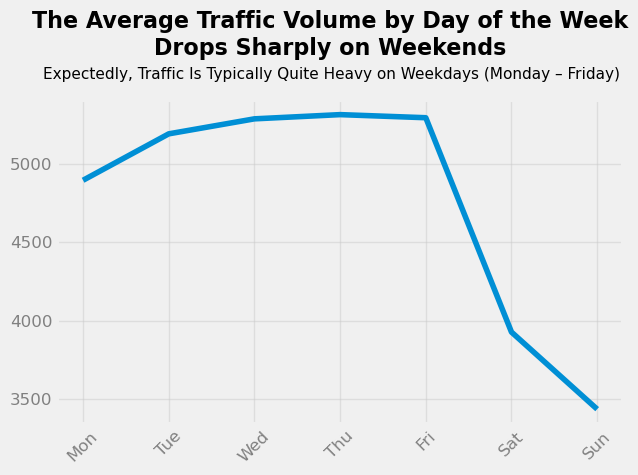

In [12]:
# Extract day of the week from the 'date_time' column
day_numeric['dayofweek'] = day['date_time'].dt.dayofweek

# Group the data and calculate the average traffic volume by day of the week
by_dayofweek = day_numeric.groupby('dayofweek')['traffic_volume'].mean()

# Define abbreviated week names
weeks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


# Specify the figure size, and plot the average traffic volume by day of the week
plt.figure(figsize=(6.5, 4))
plt.plot(by_dayofweek)

# Add a main title and a subtitle
plt.suptitle('The Average Traffic Volume by Day of the Week\nDrops Sharply on Weekends',
             x=0.5, y=1.105, size=16, ha='center', weight='bold')
plt.title('Expectedly, Traffic Is Typically Quite Heavy on Weekdays (Monday – Friday)',
          x=0.485, y=1.04, size=11, ha='center')

# Customize ticks and gridlines for both axes
plt.xticks(ticks=range(0,7), labels=weeks, rotation=45, size=12, c='grey')
plt.yticks(range(3500, 5500, 500), size=12, c='grey')
plt.grid(alpha=0.5)

# Display the plot
plt.show()

Typically, traffic is heavy on business days – from `Monday` to `Friday`. With the exception of `Monday`, the average traffic volume exceeds `5,000` cars per hour during weekdays. Conversely, traffic is lighter on weekends, with measurements below `4,000` cars.

## 7. Time Indicators (III)

We will also generate a line plot for the time of day. It's important to note that weekends will likely lower the average values. To avoid this issue, we will split the data based on the day type – `business day` or `weekend`.

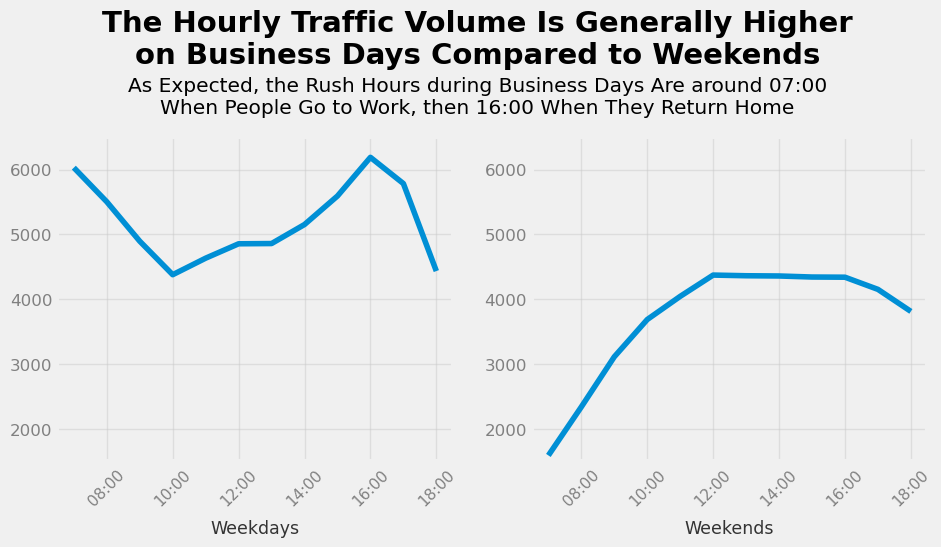

In [13]:
# Extract the hour from the 'date_time' column
day_numeric['hour'] = day['date_time'].dt.hour

# Filter data for business days (Monday to Friday), and for weekends (Saturday and Sunday)
business_days = day_numeric[day_numeric['dayofweek'] <= 4]
weekend = day_numeric[day_numeric['dayofweek'] >= 5]

# Group data by hour, and calculate the average traffic volume for business days and weekends
by_hour_business = business_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()


# Create subplots for comparing traffic volume between weekdays and weekends
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])

# Add a main title and subtitle to the figure
plt.suptitle('The Hourly Traffic Volume Is Generally Higher\n\
on Business Days Compared to Weekends',
             ha="center", weight='bold', size=21, x=0.5, y=1.2)
plt.figtext(s="As Expected, the Rush Hours during Business Days Are around 07:00\n\
When People Go to Work, then 16:00 When They Return Home",
            ha="center", x=0.5, y=0.94, size=14.5)

# Plot the hourly traffic volume for business days and weekends, then set x-axis labels
ax1.plot(by_hour_business)
ax1.set_xlabel('Weekdays', color='#333333', labelpad=8, size=12.5)

ax2.plot(by_hour_weekend)
ax2.set_xlabel('Weekends', color='#333333', labelpad=8, size=12.5)

# Customize ticks and gridlines for both axes
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', colors='grey', labelsize=11)
    ax.tick_params(axis='y', colors='grey', labelsize=12)
    ax.set_xticks(range(6, 20, 2))
    ax.set_xticklabels(['06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00'], rotation=45)
    ax.set_xlim(6.5, 18.5)
    ax.set_ylim(1500, 6500)
    ax.grid(alpha=0.5)
    
# Display the plot
plt.show()

Generally, the hourly traffic volume is higher during business days compared to weekends. As expected, the rush hours are around `7 AM` when most people travel to work, and `4 PM` when they return home. Moreover, we observe average traffic volumes of over `6,000` cars during rush hours.

So far, we have discovered several time-related indicators of heavy traffic:
* Traffic is usually heavier during warm months `(March–October)` compared to cold months `(November–February)`.
* Traffic is typically heavier on `business days` compared to `weekends`.
* On business days, the rush hours are around `7 AM` and `4 PM`.

## 8. Weather Indicators

Another potential indicator of heavy traffic is weather. The dataset includes several columns related to weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

Since some of these columns are numerical, let's start by looking up their correlation values with `traffic_volume`.

In [14]:
# Calculate the correlation between weather-related columns and traffic volume
day_numeric.corr().loc['temp':'clouds_all', 'traffic_volume']

temp          0.13
rain_1h       0.00
snow_1h       0.00
clouds_all   -0.03
Name: traffic_volume, dtype: float64

The temperature exhibits the strongest correlation with traffic volume, with a value of just `+0.13`. Conversely, the other weather-related columns such as `rain_1h`, `snow_1h`, and `clouds_all` demonstrate a weak correlation with `traffic_volume`.

Next, let's generate a scatter plot to visualize the correlation between temperature and traffic volume.

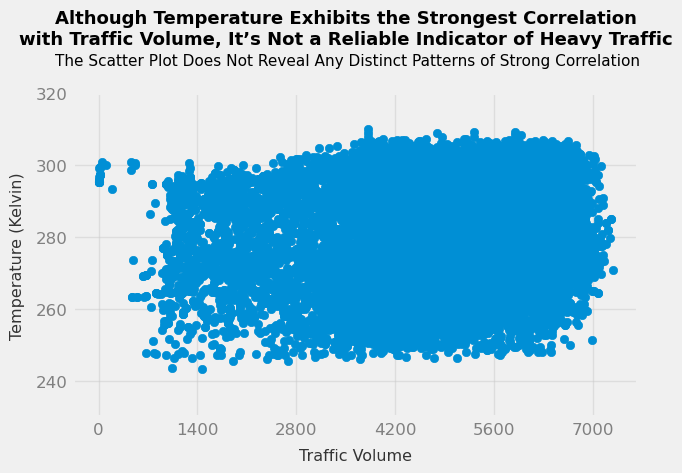

In [15]:
# Create a figure with the specified size, and plot a scatter plot to visualize the correlation
plt.figure(figsize=(6.5, 4))
plt.scatter(day['traffic_volume'], day['temp'])

# Add a main title and a subtitle
plt.suptitle('Although Temperature Exhibits the Strongest Correlation\n\
with Traffic Volume, It’s Not a Reliable Indicator of Heavy Traffic',
             x=0.5, y=1.09, size=13, ha='center', weight='bold')
plt.title('The Scatter Plot Does Not Reveal Any Distinct Patterns of Strong Correlation',
          x=0.485, y=1.06, size=11, ha='center')

# Customize ticks and gridlines, and add labels for both axes
plt.xticks(range(0, 8400, 1400), size=12, c='grey')
plt.yticks(range(240, 340, 20), size=12, c='grey')
plt.xlabel('Traffic Volume', c='#333333', labelpad=8, size=11.5)
plt.ylabel('Temperature (Kelvin)', c='#333333', labelpad=8, size=11.5)
plt.ylim(230, 320)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

We can conclude that temperature isn't a strong indicator of heavy traffic. Now, let's examine the other weather-related columns: `weather_main` and `weather_description`.

## 9. Weather Types

We'll calculate the average traffic volume for each unique value in `weather_main` and `weather_description`. Then, we'll create a horizontal bar plot for both columns to visualize the traffic volume for each weather main category and weather description.

In [16]:
# Calculate the average traffic volume for each unique value in 'weather_main'
by_weather_main = day.groupby('weather_main').agg({'traffic_volume': 'mean'})
by_weather_main

,traffic_volume
weather_main,
Clear,4778.42
Clouds,4865.42
Drizzle,4837.21
Fog,4372.49
Haze,4609.89
Mist,4623.98
Rain,4815.57
Smoke,4564.58
Snow,4396.32


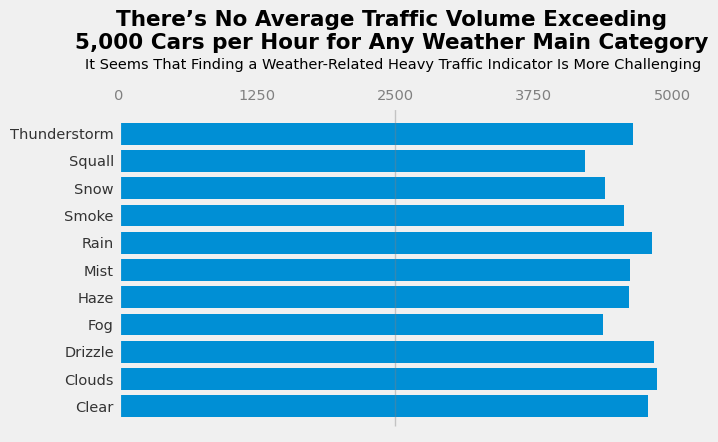

In [17]:
# Create a figure with the specified size,
# and create a horizontal bar plot for the average traffic volume of each weather main category
plt.figure(figsize=(6.5, 4))
plt.barh(y=by_weather_main.index, width=by_weather_main['traffic_volume'])

# Add a main title and a subtitle
plt.suptitle('There’s No Average Traffic Volume Exceeding\n\
5,000 Cars per Hour for Any Weather Main Category',
             x=0.5, y=1.125, size=15.5, ha='center', weight='bold')
plt.title('It Seems That Finding a Weather-Related Heavy Traffic Indicator Is More Challenging',
          x=0.485, y=1.095, size=10.5, ha='center')

# Customize ticks and gridlines for both axes, and move x-axis ticks to the top
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks(ticks=[0, 1250, 2500, 3750, 5000], size=10.5, c='grey')
plt.yticks(size=10.5, c='#333333')
plt.grid(visible=False)
plt.axvline(x=2500, ymin=0.02, color='grey', linewidth=1, alpha=0.4)

# Display the plot
plt.show()

We notice that there's no average traffic volume exceeding `5,000` cars per hour for any weather main category. Thus, finding a weather-related heavy traffic indicator seems more challenging. Let's also group by `weather_description`, which provides a more granular weather classification.

In [18]:
# Check unique values of the 'weather_description' column
day['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'proximity shower rain',
       'moderate rain', 'drizzle', 'heavy intensity rain', 'fog',
       'proximity thunderstorm', 'heavy snow', 'snow', 'freezing rain',
       'shower snow', 'light rain and snow',
       'light intensity shower rain', 'thunderstorm with heavy rain',
       'thunderstorm with rain', 'thunderstorm with light rain',
       'proximity thunderstorm with rain', 'heavy intensity drizzle',
       'Sky is Clear', 'very heavy rain',
       'proximity thunderstorm with drizzle', 'light snow',
       'thunderstorm with drizzle', 'thunderstorm', 'smoke', 'SQUALLS',
       'light shower snow', 'sleet', 'thunderstorm with light drizzle',
       'shower drizzle'], dtype=object)

Before proceeding further, we'd like to unify certain descriptions for the `weather_description` column to ensure consistency.

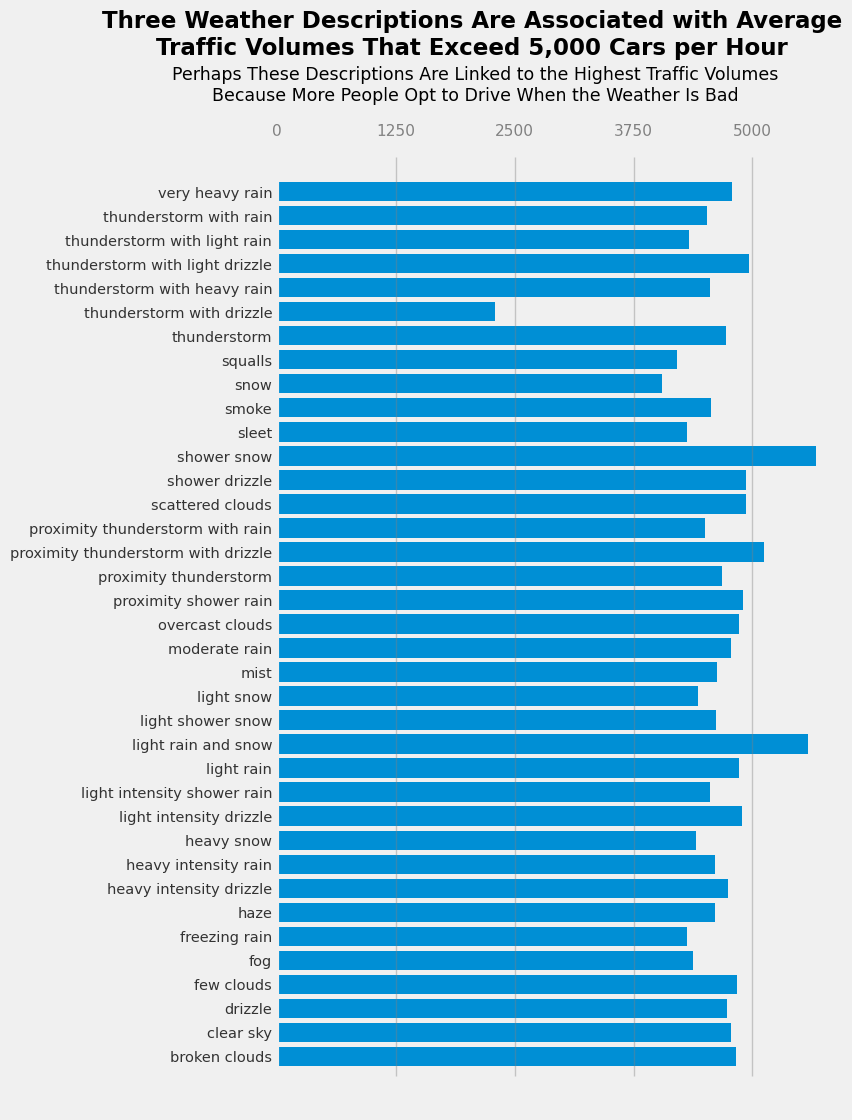

In [19]:
# Define a mapping dictionary to unify certain weather descriptions
mapping = {'Sky is Clear': 'clear sky',
           'sky is clear': 'clear sky',
           'SQUALLS': 'squalls'}

# Replace the values in the 'weather_description' column using the mapping dictionary
day['weather_description'] = day['weather_description'].replace(mapping)

# Calculate the average traffic volume for each unique value in 'weather_description'
by_weather_description = day.groupby('weather_description').agg({'traffic_volume': 'mean'})


# Create a figure with the specified size,
# and create a horizontal bar plot for the average traffic volume of each weather description
plt.figure(figsize=(6.5, 12))
plt.barh(y=by_weather_description.index, width=by_weather_description['traffic_volume'])

# Add a main title and a subtitle
plt.suptitle('Three Weather Descriptions Are Associated with Average\n\
Traffic Volumes That Exceed 5,000 Cars per Hour',
             x=0.38, y=0.987, size=16.5, ha='center', weight='bold')
plt.title('Perhaps These Descriptions Are Linked to the Highest Traffic Volumes\n\
Because More People Opt to Drive When the Weather Is Bad',
          x=0.35, y=1.03, size=12.5, ha='center')

# Customize ticks and gridlines for both axes, and move x-axis ticks to the top
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False, pad=-0.7)
plt.xticks(ticks=[0, 1250, 2500, 3750, 5000], size=11, c='grey')
plt.yticks(size=10.5, c='#333333')
plt.grid(visible=False)
for pos in [1250, 2500, 3750, 5000]:
    plt.axvline(x=pos, ymin=0.035, ymax=0.98, color='grey', linewidth=1, alpha=0.4)

# Display the plot
plt.show()

There are `3` weather descriptions associated with average traffic volumes that exceed `5,000` cars per hour: `shower snow`, `light rain and snow`, and `proximity thunderstorm with drizzle`.

It's unclear why these weather descriptions are linked to the highest traffic volumes, as they describe slightly inclement weather. Perhaps more people opt to drive rather than ride a bike or walk when the weather is bad.

## 10. Conclusion

In conclusion, we analyzed a dataset concerning westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). Each row represents traffic and weather data for a specific hour between `October 2012` and `September 2018`. Moreover, our traffic data originates from a station located approximately midway between `Minneapolis` and `Saint Paul`. As a result, our analysis specifically pertains to westbound traffic near this station rather than encompassing the entire `I-94` highway.

The hourly traffic volume ranged from `0` to `7,280` cars, with a mean average of `3,260` cars. This disparity in values led us to split the dataset into two parts for comparison – `daytime` and `nighttime` data. Furthermore, we observed that nighttime traffic is significantly lighter than daytime's. Since our focus was on identifying indicators of heavy traffic, we subsequently analyzed only the daytime data.

We uncovered several time-related indicators of heavy traffic concerning westbound traffic on `I-94`. For example, traffic is typically heavier during warm months `(March–October)` compared to cold months `(November–February)`, except for July `2016`, which showed a significant decrease in traffic volume, possibly due to road construction. Furthermore, traffic tends to be heavier on `business days` than on `weekends`. Also, rush hours on business days usually occur around `7 AM` and `4 PM`.
    
As for the weather-related indicators of heavy traffic, we discovered that `shower snow`, `light rain and snow`, and `proximity thunderstorm with drizzle` are associated with the highest traffic volumes. This suggests that more people may choose to drive rather than ride a bike or walk when the weather is inclement.